<a href="https://colab.research.google.com/github/riya287/project-on-malaria-detection/blob/master/malaria_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl "http://www.codeheroku.com/static/workshop/datasets/malaria_detection/train.csv" -o "train.csv"
!curl "http://www.codeheroku.com/static/workshop/datasets/malaria_detection/test.csv" -o "test.csv" 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  181M  100  181M    0     0  39.3M      0  0:00:04  0:00:04 --:--:-- 43.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.5M  100 45.5M    0     0  29.1M      0  0:00:01  0:00:01 --:--:-- 29.1M


In [0]:
import pandas as pd 

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv") 

In [0]:
train.head() 

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,187,0,0,0,0,0,0,0,0,...,0,0,61,187,186,188,188,186,187,187,188,187,187,186,187,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,49,90,48,...,45,167,187,188,188,187,188,188,131,31,0,38,33,0,35,52,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parasitized,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,155,190,190,190,192,190,191,190,20,1,1,1,1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,1,64,183,182,182,185,189,190,95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,152,186,185,176,5,5,5,2,0,0,0,...,0,0,0,0,0,0,0,0,5,155,186,185,174,5,0,0,5,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,10,188,187,185,184,185,183,181,181,180,180,180,180,180,179,179,179,180,178,179,133,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,63,187,188,188,188,64,0,0,148,190,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train.describe() 

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
count,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,...,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000
mean,0.082691,0.158396,0.263313,0.462624,0.699809,0.940533,1.256237,1.752245,2.414678,3.455502,4.894448,6.575388,8.821691,11.601742,15.220176,20.353851,26.642021,34.281638,42.812846,51.759231,60.642974,68.570852,75.127053,79.954504,81.961989,81.831534,79.557017,74.020276,66.999546,58.748299,49.812846,40.734464,32.374671,25.247845,18.924930,13.978091,10.153089,7.455910,5.356482,3.827815,...,3.874535,5.252835,7.436769,10.190012,13.718906,18.233648,24.221083,31.966207,40.813027,50.560646,60.395219,69.537512,76.563640,82.182119,84.872312,85.604509,83.575342,78.341785,71.273973,62.507167,53.082146,43.465663,34.124603,25.977864,19.481584,14.429919,10.359249,7.375397,5.526535,4.069718,2.935907,2.144289,1.475506,1.036242,0.735553,0.457543,0.264901,0.167559,0.089631,0.044861
std,3.222090,4.543716,6.065143,8.100107,10.053545,11.834619,13.789559,16.426943,19.113640,23.061772,27.405171,31.785211,36.653899,41.835442,47.156650,53.873886,60.308225,66.870925,72.500710,77.018895,80.574145,82.724369,83.849667,84.520405,84.616181,84.323520,84.623865,83.764289,82.245575,79.846805,76.168357,71.154628,65.276253,58.971822,51.987012,45.225648,39.079061,33.551842,28.392671,24.208123,...,24.789951,28.654528,33.867067,39.392504,45.508114,51.573124,58.587599,65.576126,72.213255,77.688168,81.854403,84.375577,85.994131,86.590532,86.655078,86.777846,86.790035,86.266996,85.005583,82.692775,79.076957,74.032516,67.672453,60.453292,53.563240,46.665045,39.924214,33.762774,29.493983,25.343608,21.399852,18.230696,15.027315,12.475082,10.453670,7.980879,5.996918,4.624739,3.298136,2.566040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [0]:
x_train = train.drop(['label'],axis=1).values 
y_train = train['label'].values

x_test = test.drop(['label'],axis=1).values 
y_test = test['label'].values 

In [0]:
x_train.shape, y_train.shape

((22046, 2500), (22046,))

In [0]:
x_test.shape, y_test.shape

((5512, 2500), (5512,))

Parasitized


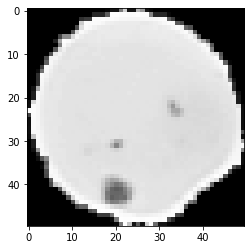

In [0]:
import matplotlib.pyplot as plt

index = 2000

plt.imshow(x_train[index].reshape(50,50),cmap='gray')
print(y_train[index])

Uninfected


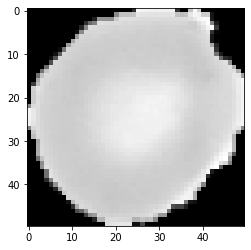

In [0]:
import matplotlib.pyplot as plt

index = 20001

plt.imshow(x_train[index].reshape(50,50),cmap='gray')
print(y_train[index])

In [0]:
x_train = x_train.reshape(train.shape[0],50,50,1).astype('float32')
x_train = x_train / 255.0

x_test = x_test.reshape(test.shape[0],50,50,1).astype('float32')
x_test = x_test / 255.0 

In [0]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
y_train[0]

array([1., 0.], dtype=float32)

In [0]:
y_train[20000]

array([0., 1.], dtype=float32)

In [0]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)

x_train shape (22046, 50, 50, 1)
y_train shape (22046, 2)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())
 
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)         

In [0]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
441/441 [==============================] - 2s 5ms/step - loss: 0.4265 - accuracy: 0.7841
Epoch 2/20
441/441 [==============================] - 2s 5ms/step - loss: 0.1726 - accuracy: 0.9382
Epoch 3/20
441/441 [==============================] - 2s 5ms/step - loss: 0.1524 - accuracy: 0.9457
Epoch 4/20
441/441 [==============================] - 2s 5ms/step - loss: 0.1386 - accuracy: 0.9501
Epoch 5/20
441/441 [==============================] - 2s 5ms/step - loss: 0.1322 - accuracy: 0.9529
Epoch 6/20
441/441 [==============================] - 2s 5ms/step - loss: 0.1209 - accuracy: 0.9578
Epoch 7/20
441/441 [==============================] - 2s 5ms/step - loss: 0.1158 - accuracy: 0.9581
Epoch 8/20
441/441 [==============================] - 2s 5ms/step - loss: 0.1073 - accuracy: 0.9611
Epoch 9/20
441/441 [==============================] - 2s 5ms/step - loss: 0.0989 - accuracy: 0.9643
Epoch 10/20
441/441 [==============================] - 2s 5ms/step - loss: 0.0916 - accuracy: 0.9664

In [0]:
predictions = model.evaluate(x_test,y_test)

173/173 [==============================] - 1s 3ms/step - loss: 0.2438 - accuracy: 0.9556


Actual [0. 1.]
Predicted [[0.13650423 0.8634957 ]]


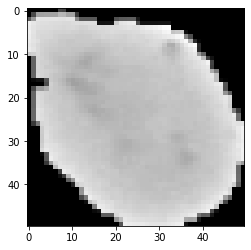

In [0]:
index = 4000
import numpy as np
plt.imshow(x_test[index].reshape(50,50),cmap='gray')
print("Actual",y_test[index])

print("Predicted", model.predict(np.array([x_test[index]])))